In [1]:
import pandas as pd
import numpy as np
import casestudy_tools as tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from casestudy_tools import preprocess
from sklearn.preprocessing import StandardScaler

In [2]:
# preprocessing step
df = tools.preprocess()

# random state
rs = 10

In [3]:
# train test split
y = df['ORGYN']
X = df.drop(['ORGYN'], axis=1)
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
                                    

In [4]:
from sklearn.preprocessing import StandardScaler
# initialise a standard scaler object
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

In [5]:
#Q2. build default regression model - Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.810041141682
Test accuracy: 0.816409179541
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.73      0.41      0.53      1652

avg / total       0.81      0.82      0.80      6667



In [7]:
print(model.coef_)

[[-0.70609843  0.01244589  0.81174692  0.02140138  0.38484826 -0.08521423
  -0.39119047 -0.00276403 -0.00340256  0.00816159  0.0056556   0.00411815
   0.00521994 -0.01580546 -0.00239069 -0.00089052  0.01434096 -0.02652518
   0.02107318 -0.02704544 -0.07418872 -0.07856464 -0.07435022 -0.07893452
  -0.06954458 -0.05825127 -0.00952424  0.01377611 -0.01625367 -0.01176906
   0.00462889  0.01434096  0.02125866 -0.00418639 -0.01314437 -0.0052902 ]]


In [8]:
feature_names = X.columns
coef = model.coef_[0]
print(feature_names)

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

Index(['AGE', 'BILL', 'AFFL', 'LTIME', 'GENDER_F', 'GENDER_M', 'GENDER_U',
       'TV_REG_Border', 'TV_REG_C Scotland', 'TV_REG_East', 'TV_REG_London',
       'TV_REG_Midlands', 'TV_REG_N East', 'TV_REG_N Scot', 'TV_REG_N West',
       'TV_REG_S & S East', 'TV_REG_S West', 'TV_REG_Ulster',
       'TV_REG_Wales & West', 'TV_REG_Yorkshire', 'NGROUP_A', 'NGROUP_B',
       'NGROUP_C', 'NGROUP_D', 'NGROUP_E', 'NGROUP_F', 'NGROUP_U',
       'REGION_Midlands', 'REGION_North', 'REGION_Scottish',
       'REGION_South East', 'REGION_South West', 'CLASS_Gold',
       'CLASS_Platinum', 'CLASS_Silver', 'CLASS_Tin'],
      dtype='object')
AGE : -0.706098432479
BILL : 0.0124458908858
AFFL : 0.81174692246
LTIME : 0.0214013847361
GENDER_F : 0.384848257983
GENDER_M : -0.0852142302794
GENDER_U : -0.391190468829
TV_REG_Border : -0.00276402781617
TV_REG_C Scotland : -0.00340255881516
TV_REG_East : 0.00816158689046
TV_REG_London : 0.00565559705755
TV_REG_Midlands : 0.00411815262058
TV_REG_N East : 0.0052199

In [9]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

AFFL : 0.81174692246
AGE : -0.706098432479
GENDER_U : -0.391190468829
GENDER_F : 0.384848257983
GENDER_M : -0.0852142302794
NGROUP_D : -0.0789345161934
NGROUP_B : -0.0785646411171
NGROUP_C : -0.0743502162717
NGROUP_A : -0.0741887160156
NGROUP_E : -0.0695445752032
NGROUP_F : -0.0582512723578
TV_REG_Yorkshire : -0.027045438528
TV_REG_Ulster : -0.026525183319
LTIME : 0.0214013847361
CLASS_Gold : 0.0212586617679
TV_REG_Wales & West : 0.0210731815236
REGION_North : -0.0162536677364
TV_REG_N Scot : -0.0158054566354
REGION_South West : 0.0143409629287
TV_REG_S West : 0.0143409629287


In [10]:
#Optimal hyperparameters with GridSearchCV model
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.810233993314
Test accuracy: 0.816409179541
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.73      0.41      0.52      1652

avg / total       0.81      0.82      0.80      6667

{'C': 0.01}


In [11]:
# most important features
import numpy as np

coef = cv.best_estimator_.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])
    

AFFL : 0.750648711553
AGE : -0.644521162381
GENDER_F : 0.354839473058
GENDER_U : -0.349692560665
GENDER_M : -0.0884200512931
NGROUP_A : -0.0395130305454
NGROUP_B : -0.0319748799284
NGROUP_D : -0.0281912017175
NGROUP_E : -0.0276841429953
TV_REG_Yorkshire : -0.0261290308281
NGROUP_C : -0.0238556304987
TV_REG_Wales & West : 0.0181431509329
REGION_North : -0.0169320205085
TV_REG_N Scot : -0.0137714133673
TV_REG_Ulster : -0.013537248815
CLASS_Gold : 0.0127959367417
REGION_Midlands : 0.0125182662778
TV_REG_S West : 0.012251783278
REGION_South West : 0.012251783278
LTIME : 0.0119027935458


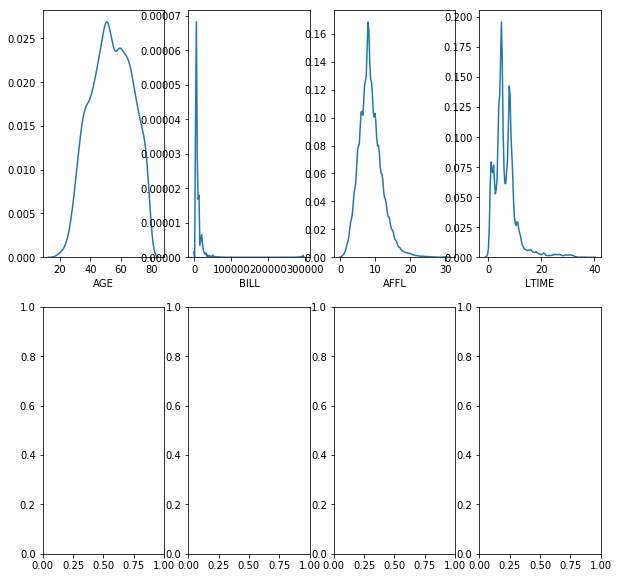

In [12]:
#Q3 Feature transformation
import matplotlib.pyplot as plt
import seaborn as sns
# get columns from X
cols = X.columns

# filter out columns with '_' in their name, as '_' indicate one-hot encoded binary variables
cols = [col for col in cols if '_' not in col]



# visualise the columns
fig, ax = plt.subplots(2,4, figsize=(10,10), sharex=False)

# draw distplots on each inspected column in X
for i, col in enumerate(cols):
    sns.distplot(X[col].dropna(), hist=False, ax=ax[int(i/4)][i%4])
    
plt.show()

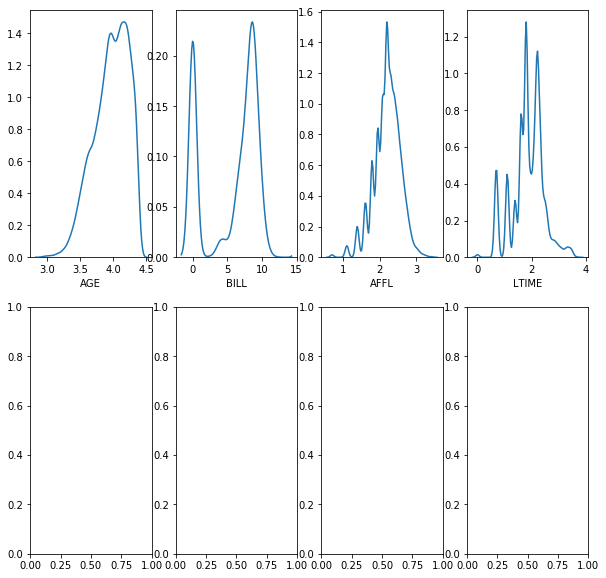

In [13]:
# list columns to be transformed
columns_to_transform = ['AGE', 'BILL', 'AFFL', 'LTIME']

# copy the dataframe
X_log = X.copy()
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    X_log[col] = X_log[col].apply(lambda x: x+1)
    X_log[col] = X_log[col].apply(np.log)

# plot them again to show the distribution
fig, ax = plt.subplots(2,4, figsize=(10,10), sharex=False)
for i, col in enumerate(columns_to_transform):
    sns.distplot(X_log[col].dropna(), hist=False, ax=ax[int(i/4)][i%4])
    
plt.show()




In [14]:
#Create X, y and train test data partitions
# create X, y and train test data partitions
y_log = df_log['ORGYN']
X_log = df_log.drop(['ORGYN'], axis=1)
X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)

In [15]:
#grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.810233993314
Test accuracy: 0.816409179541
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.73      0.41      0.52      1652

avg / total       0.81      0.82      0.80      6667

{'C': 0.01}


In [16]:
#Q3 Feature Transformation
from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV


# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)
print(rfe.get_support(indices=True)) 
#print(feature_names[0,2,4,5,6,28])
#print(feature_names(rfe.get_support(indices=True)))

Original feature set 36
Number of features after elimination 6
[ 0  2  4  5  6 28]


In [17]:
#test the performance
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [18]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train))
print("Test accuracy:", cv.score(X_test_sel, y_test))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)


Train accuracy: 0.810491128825
Test accuracy: 0.810709464527
             precision    recall  f1-score   support

          0       0.84      0.93      0.88      5015
          1       0.67      0.46      0.55      1652

avg / total       0.80      0.81      0.80      6667

{'C': 0.0001}


In [29]:
from sklearn.tree import DecisionTreeClassifier
from casestudy_tools import get_decision_tree
#from casestudy_tools import analyse_feature_importance

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(1,2)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train_log, y_train_log)

print(cv.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1}


In [31]:
# Gets feature importance and relates to the column names of the model
feature_importances = cv.best_estimator_.feature_importances_
feature_names = X_log.columns

# Sorts the features
feature_indices = np.flip(np.argsort(feature_importances), axis=0)

# Prints the features
for i in feature_indices:
    print(feature_names[i], ':', feature_importances[i])

AGE : 0.494859450146
AFFL : 0.321214414539
GENDER_F : 0.173586202149
GENDER_U : 0.010339933166
TV_REG_London : 0.0
TV_REG_S & S East : 0.0
TV_REG_N West : 0.0
TV_REG_N Scot : 0.0
TV_REG_N East : 0.0
TV_REG_Midlands : 0.0
TV_REG_C Scotland : 0.0
TV_REG_East : 0.0
CLASS_Silver : 0.0
TV_REG_Border : 0.0
GENDER_M : 0.0
LTIME : 0.0
BILL : 0.0
TV_REG_S West : 0.0
CLASS_Tin : 0.0
TV_REG_Wales & West : 0.0
REGION_Midlands : 0.0
CLASS_Platinum : 0.0
CLASS_Gold : 0.0
REGION_South West : 0.0
REGION_South East : 0.0
REGION_Scottish : 0.0
REGION_North : 0.0
NGROUP_U : 0.0
TV_REG_Yorkshire : 0.0
NGROUP_F : 0.0
NGROUP_E : 0.0
NGROUP_D : 0.0
NGROUP_C : 0.0
NGROUP_B : 0.0
NGROUP_A : 0.0
TV_REG_Ulster : 0.0


In [20]:

from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log)
X_test_sel_model = selectmodel.transform(X_test_log)

print(X_train_sel_model.shape)


(15556, 3)


In [21]:
# Grid search cv for RFE SELECTION MODEL (BEST MODEL)
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train_log)

print("Train accuracy:", cv.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_model, y_test_log))

# test the best model
y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.811519670867
Test accuracy: 0.816709164542
             precision    recall  f1-score   support

          0       0.84      0.94      0.89      5015
          1       0.71      0.44      0.54      1652

avg / total       0.80      0.82      0.80      6667

{'C': 1e-06}


In [22]:

#top 5 variables
# Evaluating the feature importance of the default_decision tree
import numpy as np

coef = cv.best_estimator_.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

BILL : 0.00231891801074
AGE : -0.00201006879851
AFFL : 0.00170023588173


In [26]:
coef

array([-0.00201007,  0.00231892,  0.00170024])